In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [15]:
df = pd.read_csv('csv/game.csv', parse_dates=['game_date'])
df = df[df['season_type'].isin(['Regular Season', 'Playoffs'])] # Filtra por tipo de temporada

latest_date = df['game_date'].max() # Encontra a data mais recente no seu dataset
cutoff_date = latest_date - pd.DateOffset(years=10) # Calcula a data de corte
df_recent = df[df['game_date'] >= cutoff_date].copy() # Filtra o DataFrame


In [16]:
###################################################################

#TESTE DE HIPÓTESES

###################################################################

In [17]:
#HIPOTESE NULA: A MÉDIA DE PONTOS EM VITÓRIAS EM CASA É IGUAL A MÉDIA DE PONTOS EM VITÓRIAS FORA DE CASA
#HIPOTESE ALTERNATIVA: A MÉDIA DE PONTOS EM VITÓRIAS EM CASA É DIFERENTE A MÉDIA DE PONTOS EM VITÓRIAS FORA DE CASA

In [18]:
#verificar a média de pontos em vitórias em casa e fora de casa
homewins_pts = df[df['wl_home'] == 'W']['pts_home']

awaywins_pts = df[df['wl_away'] == 'W']['pts_away']

In [19]:
print(f"Número de jogos com vitória em casa: {len(homewins_pts)}")
print(f"Número de jogos com vitória fora de casa: {len(awaywins_pts)}")

print(f"\nPontuações médias de vitória:")
print(f"  Em casa: {homewins_pts.mean():.2f}")
print(f"  Fora de casa: {awaywins_pts.mean():.2f}")

Número de jogos com vitória em casa: 39696
Número de jogos com vitória fora de casa: 24338

Pontuações médias de vitória:
  Em casa: 108.85
  Fora de casa: 107.40


In [20]:
#teste de hipótese
# Realizar o teste t de Student para duas amostras independentes
# 'equal_var=False' é usado se você não assume que as variâncias das duas populações são iguais (teste de Welch).
# É geralmente uma abordagem mais segura e robusta, especialmente se os tamanhos das amostras ou desvios padrão são diferentes.
t_statistic, p_value = stats.ttest_ind(homewins_pts, awaywins_pts, equal_var=False)

# Definindo o nível de significância
alpha = 0.05

# Verificando o resultado do teste
if p_value < alpha:
    print(f"Com p-valor ({p_value:.3e}) < alpha ({alpha}), rejeitamos a Hipótese Nula.")
    print(f"Há evidências estatísticas para afirmar que a pontuação média de vitória em casa é SIGNIFICATIVAMENTE DIFERENTE da pontuação média de vitória fora de casa.")
else:
    print(f"Com p-valor ({p_value:.3e}) >= alpha ({alpha}), não rejeitamos a Hipótese Nula.")
    print(f"Não há evidências estatísticas para afirmar que a pontuação média de vitória em casa é diferente da pontuação média de vitória fora de casa.")

Com p-valor (3.945e-39) < alpha (0.05), rejeitamos a Hipótese Nula.
Há evidências estatísticas para afirmar que a pontuação média de vitória em casa é SIGNIFICATIVAMENTE DIFERENTE da pontuação média de vitória fora de casa.


In [21]:
#cálculo do intervalo de confiança
mediahome = homewins_pts.mean()
desviohome = homewins_pts.std()
nhome = len(homewins_pts)

mediaaway = awaywins_pts.mean()
desvioaway = awaywins_pts.std()
naway = len(awaywins_pts)

#diferença das médias
diferenca = mediahome - mediaaway

#error padrão da diferença
erro_padrao = np.sqrt((desviohome**2 / nhome) + (desvioaway**2 / naway))

nivel_confianca = 0.95
alpha = 1 - nivel_confianca

#graus de liberdade
graus_liberdade = min(nhome - 1, naway - 1)

#valor crítico t
t_critico = stats.t.ppf(1 - alpha / 2, graus_liberdade)

margem_erro = t_critico * erro_padrao
limite_inferior = diferenca - margem_erro
limite_superior = diferenca + margem_erro

print(f"\nIntervalo de Confiança para a diferença de médias (95%):")
print(f"\nDiferença de médias: {diferenca:.2f}")
print(f"\nErro padrão: {erro_padrao:.2f}")
print(f"\nValor crítico t: {t_critico:.2f}")
print(f"\nMargem de erro: {margem_erro:.2f}")
print(f"\nLimite inferior: {limite_inferior:.2f}")
print(f"\nLimite superior: {limite_superior:.2f}")

# Interpretação do Intervalo de Confiança
print("\nInterpretação do Intervalo de Confiança")
if limite_inferior <= 0 <= limite_superior:
    print("O intervalo de confiança INCLUI zero. Isso sugere que não há uma diferença estatisticamente significativa entre as pontuações médias de vitória em casa e fora de casa.")
    print("Não podemos ter 95% de confiança de que a diferença real não é zero.")
else:
    print("O intervalo de confiança NÃO INCLUI zero. Isso sugere que há uma diferença estatisticamente significativa entre as pontuações médias de vitória em casa e fora de casa.")
    print("Podemos ter 95% de confiança de que a verdadeira diferença média está entre "
          f"{limite_inferior:.2f} e {limite_superior:.2f}.")
    if limite_inferior > 0:
        print("Como o intervalo é todo positivo, a pontuação média de vitória em casa é significativamente MAIOR que a fora de casa.")
    else: # limite_superior < 0
        print("Como o intervalo é todo negativo, a pontuação média de vitória em casa é significativamente MENOR que a fora de casa.")





Intervalo de Confiança para a diferença de médias (95%):

Diferença de médias: 1.45

Erro padrão: 0.11

Valor crítico t: 1.96

Margem de erro: 0.22

Limite inferior: 1.24

Limite superior: 1.67

Interpretação do Intervalo de Confiança
O intervalo de confiança NÃO INCLUI zero. Isso sugere que há uma diferença estatisticamente significativa entre as pontuações médias de vitória em casa e fora de casa.
Podemos ter 95% de confiança de que a verdadeira diferença média está entre 1.24 e 1.67.
Como o intervalo é todo positivo, a pontuação média de vitória em casa é significativamente MAIOR que a fora de casa.


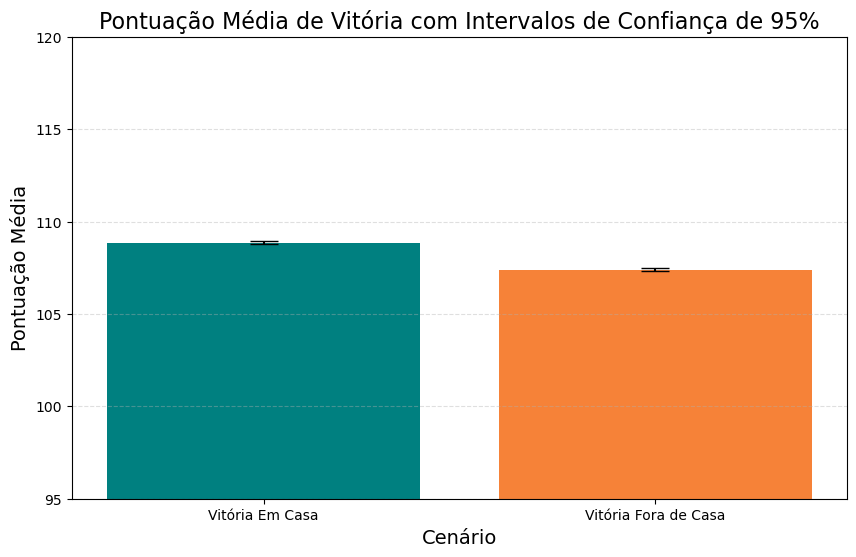

In [27]:
#gráfico para visualizar o intervalo de confiança
#definir medias e erros para cada grupo

errohome = homewins_pts.std() / np.sqrt(len(homewins_pts))
erroaway = awaywins_pts.std() / np.sqrt(len(awaywins_pts))

#definir intervalo de confiança para media em vitorias em casa  emedia em vitorias fora
ci_home = stats.t.interval(confidence=nivel_confianca, df=len(homewins_pts)-1, loc=mediahome, scale=errohome)
error_home = mediahome - ci_home[0] # A distância do IC ao centro

ci_away = stats.t.interval(confidence=nivel_confianca, df=len(awaywins_pts)-1, loc=mediaaway, scale=erroaway)
error_away = mediaaway - ci_away[0] # A distância do IC ao centro

# Preparar os dados para o plot
plot_data = pd.DataFrame({
    'Cenário': ['Vitória Em Casa', 'Vitória Fora de Casa'],
    'Média de Pontos': [mediahome, mediaaway],
    'Margem de Erro (95% CI)': [errohome, erroaway]
})

plt.figure(figsize=(10, 6))
# Usar plt.bar para maior controle sobre os error bars
plt.bar(plot_data['Cenário'], plot_data['Média de Pontos'],
        yerr=plot_data['Margem de Erro (95% CI)'],
        capsize=10, # Tamanho dos "caps" no topo das barras de erro
        color=['teal', '#f68238'])


plt.title('Pontuação Média de Vitória com Intervalos de Confiança de 95%', fontsize=16)
plt.xlabel('Cenário', fontsize=14)
plt.ylabel('Pontuação Média', fontsize=14)
plt.ylim(95, 120) # Ajustar o limite Y para focar na diferença
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

In [23]:
df = df[df['season_type'].isin(['Regular Season', 'Playoffs'])]
df = df.loc[:, ['game_date', 'pts_home', 'pts_away']]
df.insert(0, 'game_year', df['game_date'].dt.year)
df.drop(columns=['game_date'], inplace=True)


In [24]:
#df.columns

In [25]:
df['winner_score'] = df[['pts_home', 'pts_away']].max(axis=1)

Text(0, 0.5, 'Média de pontos')

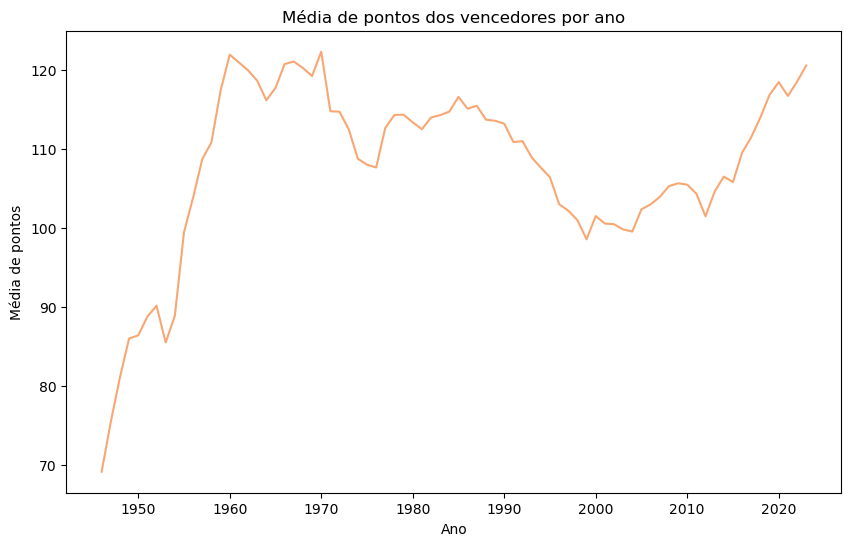

In [28]:
mediavencedores = df.groupby(['game_year'])['winner_score'].mean()
mediavencedores.plot(kind='line', figsize=(10, 6), color='#f68238', alpha=0.7)
plt.title('Média de pontos dos vencedores por ano')
plt.xlabel('Ano')
plt.ylabel('Média de pontos')